In [1]:
train_path = r"C:\Users\anai\dive\Graduation_Assignment\anpanman\data_1st\reline_test/"
test_ok_path = r"C:\Users\anai\dive\Graduation_Assignment\anpanman\OK/"
test_ng_path = r"C:\Users\anai\dive\Graduation_Assignment\anpanman\NG/"

In [ ]:
!python train_BiGAN.py --file_train_data="C:\Users\anai\dive\Graduation_Assignment\anpanman\data_1st\reline_test/" --test_true_data="C:\Users\anai\dive\Graduation_Assignment\anpanman\OK/" --test_false_data="C:\Users\anai\dive\Graduation_Assignment\anpanman\NG/" --epoch=1000

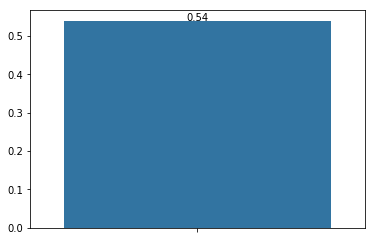

In [48]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
score = 0.54
ax=sns.barplot(y=score)
show_values_on_bars(ax)

AttributeError: 'list' object has no attribute 'get_x'

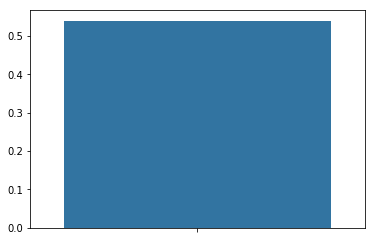

In [54]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


        
score = 0.54
ax=sns.barplot(y=score)
display(ax.patches)
_x = ax.patches.get_x() + ax.patches.get_width() / 2
_y = ax.patches.get_y() + ax.patches.get_height()
value = '{:.2f}'.format(ax.patches.get_height())
ax.text(_x, _y, value, ha="center")




In [52]:
ax

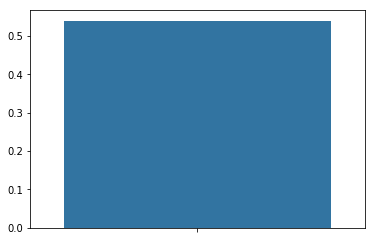

In [56]:
sns.barplot(y=score, hue=score)

<function matplotlib.pyplot.show(*args, **kw)>

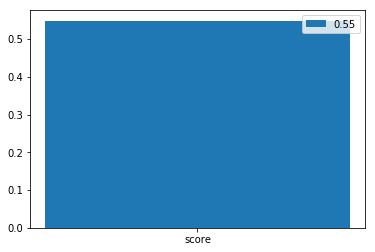

In [94]:
x="score"
score = 0.54888

plt.bar(x,score,label=round(score,2))
plt.legend()
plt.show

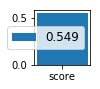

In [103]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

fig, ax = plt.subplots(figsize=(1, 1))
#fig, ax = plt.subplots()

ax.bar(x,score,label=round(score,3))
ax.legend(loc='right', fontsize=12)

fig.canvas.draw()
#im = np.array(fig.canvas.renderer.buffer_rgba())
im = np.array(fig.canvas.renderer._renderer) # matplotlibが3.1より前の場合

img = Image.fromarray(im)
img.show()

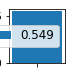

In [101]:
img

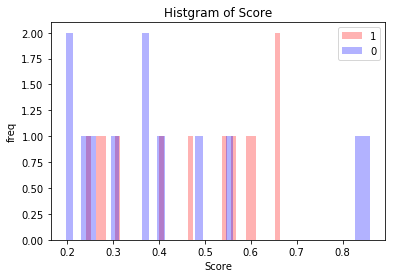

In [4]:
from matplotlib import pyplot as plt
list_1 = [0.306,0.266,0.283,0.592,0.663,0.662,0.537,0.605,0.242,0.468,0.559,0.402]
list_0 = [0.405,0.86, 0.234,0.197,0.366,0.378,0.303,0.49, 0.836,0.26, 0.204,0.548]
plt.title("Histgram of Score")
plt.xlabel("Score")
plt.ylabel("freq")
plt.hist(list_1, bins=40, alpha=0.3, histtype='stepfilled', color='r', label="1")
plt.hist(list_0, bins=40, alpha=0.3, histtype='stepfilled', color='b', label='0')
plt.legend(loc=1)
plt.savefig("resultScoreHist_191027_1000.png")
plt.show()

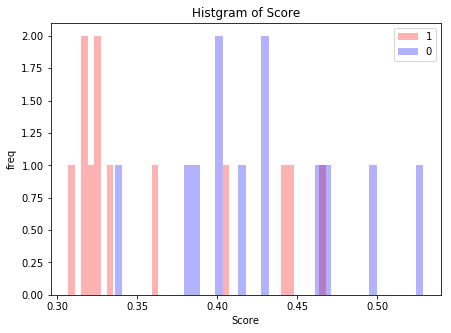

In [3]:
from matplotlib import pyplot as plt
list_1 = [0.307,0.316,0.325,0.407,0.36 ,0.324,0.318,0.468,0.323,0.335,0.442,0.444]
list_0 = [0.336,0.431,0.529,0.462,0.496,0.414,0.383,0.467,0.403,0.386,0.402,0.429]
plt.figure(figsize=(7, 5))
plt.title("Histgram of Score")
plt.xlabel("Score")
plt.ylabel("freq")
plt.hist(list_1, bins=40, alpha=0.3, histtype='stepfilled', color='r', label="1")
plt.hist(list_0, bins=40, alpha=0.3, histtype='stepfilled', color='b', label='0')
plt.legend(loc=1)
plt.savefig("resultScoreHist_191103_1000.png")
plt.show()

### 2値化デバック  画像をnumpy化したものをtxt、histogramを保存するコード

In [11]:
from matplotlib import pyplot as plt
def make_histogram(in_np, out_path_filename):
    """
    Overview: histogramをpngで保存、出力
    Input   : numpy shape(1, :)
    Output  : histogramを出力、histogramを保存(拡張子は関数の外で定義)
    """
    in_list = in_np.tolist()
    #plt.title("Histgram of Score")
    #plt.xlabel("Score")
    #plt.ylabel("freq")
    plt.hist(in_list, bins=40, alpha=0.3, histtype='stepfilled', color='r')
    #plt.legend(loc=1)
    plt.savefig(out_path_filename)
    plt.show()

In [15]:
import os
import cv2
import numpy as np
false_path = r"C:\Users\anai\dive\Graduation_Assignment\anpanman\191102_dataset\0.debug\moto/"
path2 = r"C:\Users\anai\dive\Graduation_Assignment\anpanman\191102_dataset\0.debug\out/"
test_false_list = os.listdir(false_path)
display(test_false_list)

['0318.jpg', 'anai.jpg']

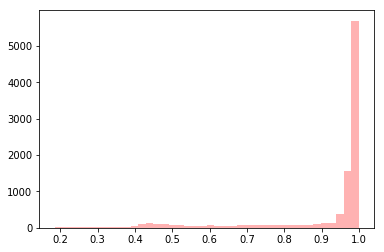

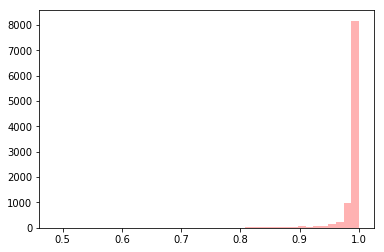

In [16]:
y_test_false = np.zeros(len(test_false_list))
x_test_false = np.empty((0, 100*100))
for img in test_false_list:    
    path_name = false_path+img
    x_img = cv2.imread(path_name)
    x_img = cv2.resize(x_img, (100, 100))
    x_img= cv2.cvtColor(x_img, cv2.COLOR_BGR2GRAY)
    x_img = np.array(x_img)
    x_img = x_img / 255.0
    x_img = x_img.reshape((1, 100, 100))
    x_img2 = x_img.reshape((100, 100))
    np.savetxt(path2+"_"+img+".txt", x_img2)
    x_img = x_img.reshape(1, 10000)
    make_histogram(x_img, path2+"_"+img+".png")
    x_test_false = np.concatenate([x_test_false, x_img], axis = 0)

### 「最頻値-0.1」を閾値として0,1の2値化してみる

In [69]:
import os
import cv2
import numpy as np
false_path = r"C:\Users\anai\dive\Graduation_Assignment\anpanman\191102_dataset\0.debug\moto/"
path2 = r"C:\Users\anai\dive\Graduation_Assignment\anpanman\191102_dataset\0.debug\out/"
test_false_list = os.listdir(false_path)
display(test_false_list)

['00002.jpg',
 '0002.jpg',
 '0005.jpg',
 '0013.jpg',
 '0030.jpg',
 '0032.jpg',
 '0036.jpg',
 '0045.jpg',
 '0052.jpg',
 '0070.jpg',
 '0071.jpg',
 '0175.jpg',
 '0251.jpg',
 '0318.jpg',
 '20151003-03ann.jpg',
 '7.23.jpg',
 'aa6f6915a6d3f183d7dab5e4d8fd52e5.jpg',
 'ae13c5b0.jpg',
 'anai.jpg',
 'dl_2.jpg',
 'DSC_0257.jpg',
 'DSC_06161.jpg',
 'EBMefTIU4AYLSKR.jpg',
 'maxresdefault.jpg',
 'mig_1.jpg',
 'mig_3.jpg',
 'mig_4.jpg',
 'mig_5.jpg',
 'yamasan.jpg']

In [59]:
import scipy.stats as stats
from PIL import Image
y_test_false = np.zeros(len(test_false_list))
x_test_false = np.empty((0, 100*100))
for img in test_false_list:    
    path_name = false_path+img
    x_img = cv2.imread(path_name)
    x_img = cv2.resize(x_img, (100, 100))
    x_img= cv2.cvtColor(x_img, cv2.COLOR_BGR2GRAY)
    x_img = np.array(x_img)
    x_img = x_img / 255.0
    x_img = x_img.reshape((1, 100, 100))
    #np.savetxt(path2+"_"+img+".txt", x_img2)
    x_img = x_img.reshape(1, 10000)
    #x_list = x_img.tolist()
    m = stats.mode(x_img)
    #display(m.mode[0][0])
    max_hindo = m.mode[0][0]
    th = (c+1)*0.5
    th_0_1 = max_hindo-th
    x_img = np.where(x_img>th_0_1, 1, 0)
    display(np.count_nonzero(x_img == 0))
    x_img = x_img.reshape(100, 100)
    x_img = (x_img * 2.0) - 1.0
    
    img_np_255 = (x_img + 1.0) * 127.5
    img_np_255_mod1 = np.maximum(img_np_255, 0)
    img_np_255_mod1 = np.minimum(img_np_255_mod1, 255)
    img_np_uint8 = img_np_255_mod1.astype(np.uint8)
    #display(np.min(img_np_uint8))
    image = Image.fromarray(img_np_uint8)
    
    image.save(path2+img, quality=95)
    #cv2.imwrite(path2+img, image)
    
    #x_test_false = np.concatenate([x_test_false, x_img], axis = 0)

1196

1

6

### 2値化　(閾値を　0の数が指定値(現状1400)以上になるように設定する)

In [79]:
import os
import cv2
import numpy as np
false_path = r"C:\Users\anai\dive\Graduation_Assignment\anpanman\191103_dataset\3.Gray\Test_False/"
path2 = r"C:\Users\anai\dive\Graduation_Assignment\anpanman\191103_dataset\4.Binarization\Test_False/"
test_false_list = os.listdir(false_path)
display(test_false_list)

['0004.jpg',
 '0232.jpg',
 '0288.jpg',
 '10021780204.jpg',
 '34885188_2050632348535401_6188880820783022080_n.jpg',
 '49686670_929142313950980_6799393422913014805_n_.jpg',
 'baiKinmsn.jpg',
 'dokinchan.jpg',
 'hamada.jpg',
 'hosino_gen.jpg',
 'mqdefault.jpg',
 'shokupanman.jpg']

In [80]:
import scipy.stats as stats
from PIL import Image
y_test_false = np.zeros(len(test_false_list))
x_test_false = np.empty((0, 100*100))
for img in test_false_list:    
    path_name = false_path+img
    x_img = cv2.imread(path_name)
    x_img = cv2.resize(x_img, (100, 100))
    x_img= cv2.cvtColor(x_img, cv2.COLOR_BGR2GRAY)
    x_img = np.array(x_img)
    x_img = x_img / 255.0
    x_img = x_img.reshape((1, 100, 100))
    #np.savetxt(path2+"_"+img+".txt", x_img2)
    x_img = x_img.reshape(1, 10000)
    #x_list = x_img.tolist()
    m = stats.mode(x_img)
    #display(m.mode[0][0])
    max_hindo = m.mode[0][0]
    for c in reversed(range(50)):
        th = (c+1)*0.01
        th_0_1 = max_hindo-th
        x_img_ = np.where(x_img>th_0_1, 1, 0)
        if (np.count_nonzero(x_img_ == 0))>1400:
            break   
    display(np.count_nonzero(x_img_ == 0))
    x_img = x_img_.reshape(100, 100)
    x_img = (x_img * 2.0) - 1.0
    
    img_np_255 = (x_img + 1.0) * 127.5
    img_np_255_mod1 = np.maximum(img_np_255, 0)
    img_np_255_mod1 = np.minimum(img_np_255_mod1, 255)
    img_np_uint8 = img_np_255_mod1.astype(np.uint8)
    #display(np.min(img_np_uint8))
    image = Image.fromarray(img_np_uint8)
    
    image.save(path2+img, quality=95)
    #cv2.imwrite(path2+img, image)
    
    #x_test_false = np.concatenate([x_test_false, x_img], axis = 0)

1328

1743

1568

1532

1905

1402

1420

1405

1406

1125

1436

1409

In [ ]:
import cv2
import numpy as np
def make_contour_image2(path):
    neiborhood24 = np.array([[1, 1, 1, 1, 1],
                             [1, 1, 1, 1, 1],
                             [1, 1, 1, 1, 1],
                             [1, 1, 1, 1, 1],
                             [1, 1, 1, 1, 1]],
                             np.uint8)
    # グレースケールで画像を読み込む.
    gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    #cv2.imwrite("gray.jpg", gray)

    # 白い部分を膨張させる.
    dilated = cv2.dilate(gray, neiborhood24, iterations=1)
    #cv2.imwrite("dilated.jpg", dilated)

    # 差をとる.
    diff = cv2.absdiff(dilated, gray)
    #cv2.imwrite("diff.jpg", diff)

    # 白黒反転
    output = 255 - diff
    #cv2.imwrite(r"C:\Users\anai\dive\Graduation_Assignment\anpanman\test\0005_re.jpg", output)
    return output

In [ ]:
import os
path = r"C:\Users\anai\dive\Graduation_Assignment\anpanman\191102_dataset\0.debug\moto/"

x_list = os.listdir(path)
display(x_list)

In [ ]:
path2 = r"C:\Users\anai\dive\Graduation_Assignment\anpanman\191102_dataset\0.debug\out/"
#os.makedirs(path2)
for name in x_list:
    pathname = path+name
    display(pathname)
    img = make_contour_image2(pathname)
    cv2.imwrite(path2+name, img)

In [24]:
from collections import Counter

list_x = [1,1,1,2,2,3,4,5,5,5]
c = Counter(list_x)
c.most_common()
#[(1,2),(2,2),(3,1),(4,1),(5,3)]
#左から1が２回、２が２回、３が１回、４が１回、５が３回となります。
#もっとも多い数が欲しい時は
display(c.most_common(1))
#と入力すると[(5, 3)]が表示されます。
#また出現回数や最も多く出現した数のみ、算出したい場合は、
mode = c.most_common(2)

display(mode[0])
#[(5,3)]
display(mode[0][0])
#5
display(mode[0][1])
#3


[(1, 3)]

(1, 3)

1

3

In [33]:
import scipy.stats as stats
data = np.array([1,2,2,2,3,3,5,5,5,5,7,7,10])
m = stats.mode(data)
display(m.mode[0]) # 5
display(m.count[0]) # 3

5

4

In [67]:
for c in reversed(range(0,500,5)):
    display(c)

495

490

485

480

475

470

465

460

455

450

445

440

435

430

425

420

415

410

405

400

395

390

385

380

375

370

365

360

355

350

345

340

335

330

325

320

315

310

305

300

295

290

285

280

275

270

265

260

255

250

245

240

235

230

225

220

215

210

205

200

195

190

185

180

175

170

165

160

155

150

145

140

135

130

125

120

115

110

105

100

95

90

85

80

75

70

65

60

55

50

45

40

35

30

25

20

15

10

5

0

In [54]:
for i in range(5):
    display(i)

0

1

2

3

4

In [1]:
import sys,os
sys.path.append(r"C:\Users\anai\my_tool")
from Augmentation import *

C:\Users\anai\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
path_in = r"C:\Users\anai\dive\Graduation_Assignment\anpanman\191104_dataset\2.reline\Train/"
path_out = r"C:\Users\anai\dive\Graduation_Assignment\anpanman\191104_dataset\3.Gray\Train/"

In [3]:
make_gray_scale(path_in, path_out)

In [2]:
path_in = r"C:\Users\anai\dive\Graduation_Assignment\anpanman\191104_dataset\3.Gray\Train/"
path_out = r"C:\Users\anai\dive\Graduation_Assignment\anpanman\191104_dataset\4.Binarization\Train/"

In [3]:
image_binarization(path_in, path_out, 1400)

1409

1472

1450

1582

1043

1417

1480

1402

740

1036

1440

1441

1404

1478

1434

1415

1406

1423

1513

1402

1450

1415

In [2]:
path_in = r"C:\Users\anai\dive\Graduation_Assignment\anpanman\191104_dataset\3.Gray\Train/"
path_out = r"C:\Users\anai\dive\Graduation_Assignment\anpanman\191104_dataset\5.Augmentaion\Train/"

In [3]:
binarization_gradation_h_flip_augmantation(path_in, path_out, 50, 2, 900, 1900)

In [1]:
path=r"C:\Users\anai\dive\Dic_Graduation_Assignment\BiGAN_anpanman\BiGAN_191027\tensorboard\log180926/events.out.tfevents.1572169912.f2b64775a1ea"

In [4]:
!tensorboard --logdir=logs/path

'tensorboard' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。


In [6]:
import tensorflow as tf

C:\Users\anai\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [26]:
sess = tf.InteractiveSession()
target = tf.random_normal(shape=tf.shape(3,3), mean=1.0, stddev=0.01, dtype=tf.float32, seed=1)
sess.run(target)

TypeError: expected string or bytes-like object

In [17]:

target = tf.random_normal(shape=tf.shape(3,3))
sess=tf.session
y=sess.run(target)
y

TypeError: expected string or bytes-like object

In [17]:
some_test = tf.Variable(tf.random_normal([2, 2], mean=0.0, stddev=1.0, dtype=tf.float32))

In [19]:
import tensorflow as tf
import numpy as np
some_test = tf.constant(
    np.random.normal(loc=0.0, scale=1.0, size=(2, 2)).astype(np.float32))

In [20]:
sess = tf.Session()
sess.run(some_test)

array([[ 0.06469601, -0.6136826 ],
       [ 1.0134139 ,  0.38666043]], dtype=float32)

In [18]:
sess.run(some_test.initializer) 

In [25]:
import tensorflow as tf

x = tf.random_normal(shape=[3,3],mean=0.0, stddev=1.0,dtype=tf.float32)
sess = tf.Session()
sess.run(x)

array([[ 0.5895564 ,  1.9014733 ,  1.0839783 ],
       [-1.3292559 ,  0.36549646,  1.1146027 ],
       [ 1.0875958 , -0.21285698,  0.28020364]], dtype=float32)

In [29]:
#sess = tf.InteractiveSession()
target = tf.random_normal(shape=(3,3), mean=1.0, stddev=0.01, dtype=tf.float32, seed=1)
sess.run(target)

array([[0.9918868 , 1.014846  , 1.0006533 ],
       [0.97557294, 1.0009925 , 1.0059122 ],
       [1.0059283 , 0.97877073, 0.992771  ]], dtype=float32)

In [4]:
import numpy as np
print(np.load('./score_threshold.npy'))

0.6289361119270325
